In [18]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import pandas as pd
import matplotlib.pyplot as plt
from src import config

In [19]:
from src.models.llms import load_llm

llm = load_llm()

In [20]:
df = pd.read_csv("../data/raw/income.csv")
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [21]:
data_agent = create_pandas_dataframe_agent(
    llm=llm,
    df = df,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    verbose=True,
    return_intermediate_steps=True
)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['income_level'].describe()"}`


count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income_level, dtype: float64

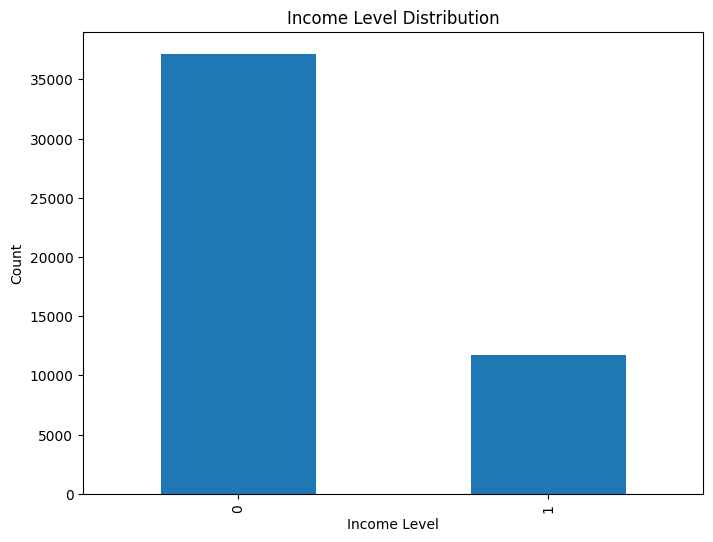


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\nplt.figure(figsize=(8, 6))\ndf['income_level'].value_counts().plot(kind='bar')\nplt.title('Income Level Distribution')\nplt.xlabel('Income Level')\nplt.ylabel('Count')\nplt.show()"}`


The income of people in the dataset is as follows:
- Count: 48842
- Mean: 0.239282
- Standard Deviation: 0.426649
- Minimum: 0
- 25th Percentile: 0
- Median (50th Percentile): 0
- 75th Percentile: 0
- Maximum: 1

I have also plotted the distribution of income levels in the dataset. The bar plot shows the count of each income level category.

> Finished chain.


In [22]:
query = "Describe the income of people in the dataset, and plot the data"
response = data_agent(query)

In [23]:
response['intermediate_steps'][-1][0].tool_input['query']

"import matplotlib.pyplot as plt\n\nplt.figure(figsize=(8, 6))\ndf['income_level'].value_counts().plot(kind='bar')\nplt.title('Income Level Distribution')\nplt.xlabel('Income Level')\nplt.ylabel('Count')\nplt.show()"